# PLOT ASTROCAT OUTPUT

In [1]:
import xarray as xr
import hvplot.xarray
import holoviews as hv

import matplotlib
from matplotlib import pyplot as plt

In [2]:
# for i in range(2,51):

In [3]:
datalist = []
for i in range(2,51):
    datalist.append(xr.open_dataset("onetofifty/ASTroCAT_"+str(i)+".nc"))

In [7]:
dat = datalist[48]

In [13]:
dat.Phytoplankton__var_value.hvplot.bar(x='var', groupby='time', xaxis=None,
                                        width=500, hover=False, rot=90)

:DynamicMap   [time]
   :Bars   [var,Variable]   (value)

In [14]:
dat.Zooplankton__var_value.hvplot.bar(x='var', groupby='time', xaxis=None,
                                        width=500, hover=False, rot=90)

:DynamicMap   [time]
   :Bars   [var,Variable]   (value)

<ipython-input-193-f482ab5b97e4>:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax2plt = ax2.pcolor(dat.Time__time, dat.Phytoplankton__sizes, dat.Phytoplankton__var_value, vmin=0, vmax=1.)
<ipython-input-193-f482ab5b97e4>:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax3plt = ax3.pcolor( dat.Time__time, dat.Zooplankton__sizes, dat.Zooplankton__var_value, vmin=0, vmax=0.3)


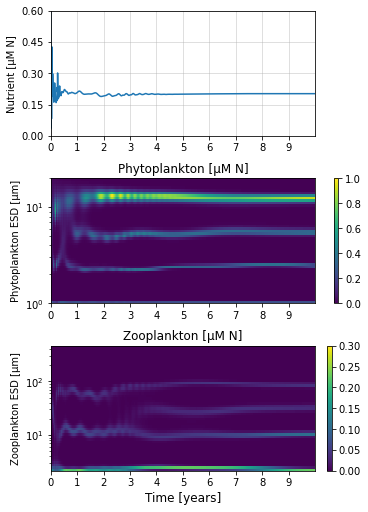

In [193]:
plt.rcParams['figure.figsize'] = [5, 7]

fig = plt.figure(constrained_layout=True)

gs = fig.add_gridspec(nrows=3, ncols=1,
                        hspace=0.1, wspace=0.1, height_ratios=[1,1,1])

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2, 0])


plt.setp((ax1, ax2, ax3), xticks=[1,365,2*365,3*365,4*365,5*365,6*365,7*365,8*365,9*365,10*365])
from matplotlib.ticker import MaxNLocator
for axe in (ax1, ax2, ax3):  
        axe.grid(True, alpha=0.5)
        axe.get_yaxis().set_major_locator(MaxNLocator(nbins=4))
        #axe.tick_params(top=False, right=True, direction="in")
        axe.set_xticklabels(labels=[i for i in range(0,11)])
        
#ax1.set_title('Nutrient Concentration')
ax1plt = ax1.plot(dat.Time__time, dat.Nutrient__var_value)
ax1plt
#ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.set_ylabel('Nutrient [µM N]')
ax1.set_ylim([0,.6])
#ax1.set_xticklabels(labels=[i for i in range(1,12)])

ax2.set_title('Phytoplankton [µM N]')
ax2.set_ylabel('Phytoplankton ESD [µm]')
ax2.set_yscale('log')
ax2plt = ax2.pcolor(dat.Time__time, dat.Phytoplankton__sizes, dat.Phytoplankton__var_value, vmin=0, vmax=1.)
ax2plt
fig.colorbar(ax2plt, ax=ax2)

ax3.set_title('Zooplankton [µM N]')
ax3.set_ylabel('Zooplankton ESD [µm]')
ax3.set_yscale('log')
ax3plt = ax3.pcolor( dat.Time__time, dat.Zooplankton__sizes, dat.Zooplankton__var_value, vmin=0, vmax=0.3)
ax3plt
fig.colorbar(ax3plt, ax=ax3)

ax3.set_xlabel('Time [years]', fontsize='large')

"""
ax2.pcolormesh(P_out.time[::resolution],P_out.P__sizes,P_out.env__stateout[::resolution].T, linewidth=0,rasterized=True)
ax2.set_yscale('log')
ax2.set_yticks([1,2,5,10,20])
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax2.set_ylabel('Phytoplankton ESD [µm]')
ax2.set_xlabel('Time [years]')
ax2.set_xticklabels(labels=[i for i in range(1,11)])

ax3.set_title('Zooplankton biomass [µM N]')
ax3plt = ax3.pcolormesh(Z_out.time[::resolution],Z_out.Z__sizes,Z_out.env__stateout[::resolution].T, linewidth=0,rasterized=True)
ax3plt
ax3.set_yscale('log')
ax3.set_yticks([3,5,10,20,50,100,200,400])
ax3.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.colorbar(ax3plt, cax=ax3col, orientation='horizontal')
ax3.set_ylabel('Zooplankton ESD [µm]')
ax3.set_xlabel('Time [years]')
ax3.set_xticklabels(labels=[i for i in range(1,11)])
"""
# Defining custom 'xlim' and 'ylim' values.
xlim = (0, 365*9+364)

# Setting the values for all axes.
plt.setp((ax1, ax2, ax3), xlim=xlim)

#f1.align_ylabels()

plt.savefig('03_chemostat_01.pdf', bbox_inches='tight')
plt.show()

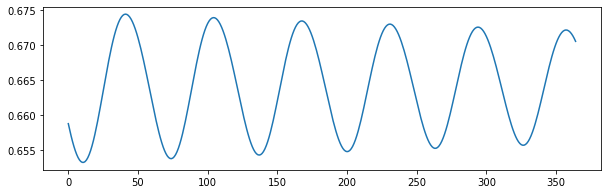

In [147]:
plt.plot(np.mean(datalist[3].Phytoplankton__var_value[...,-365:], axis=0).T)

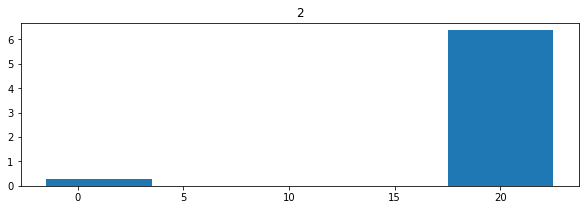

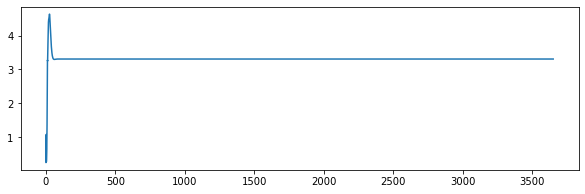

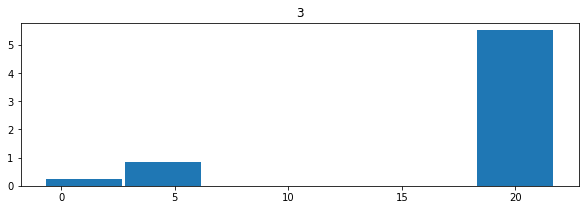

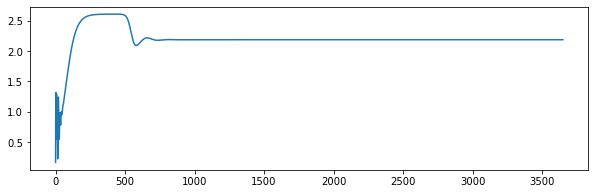

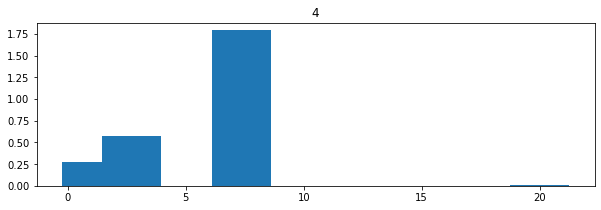

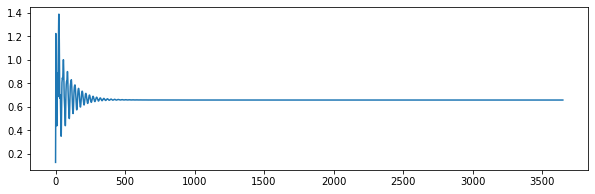

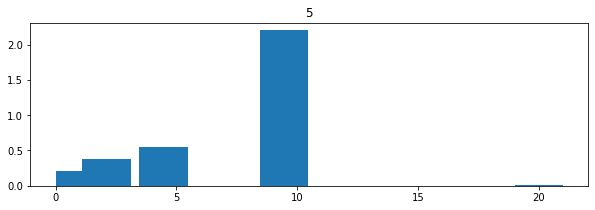

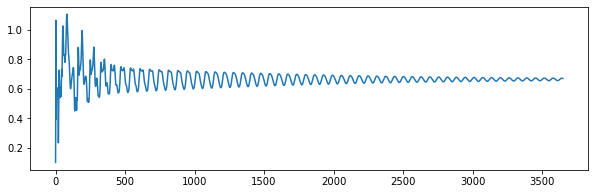

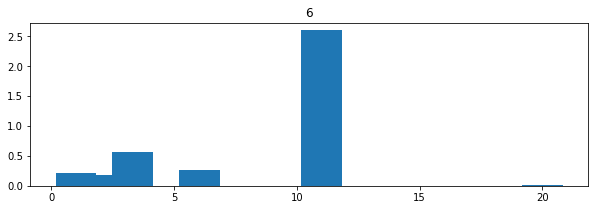

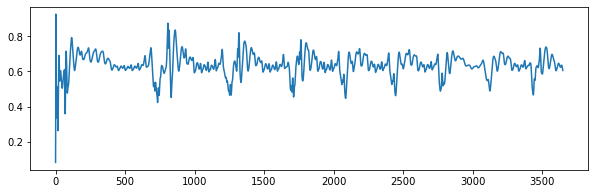

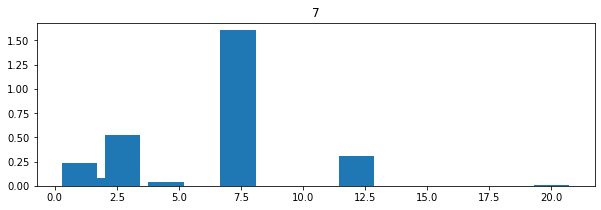

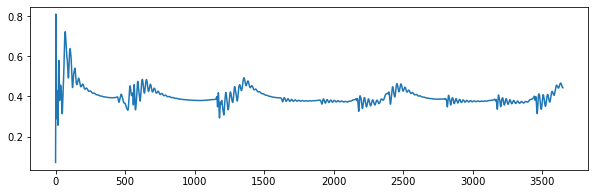

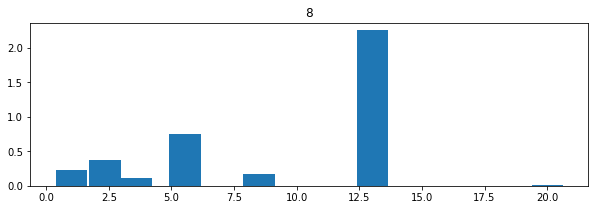

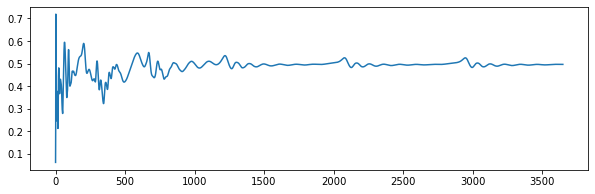

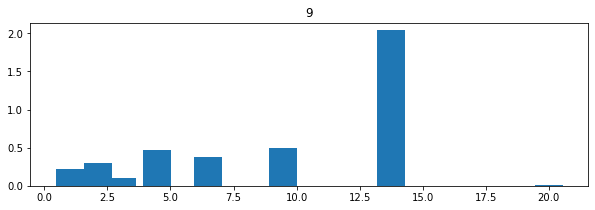

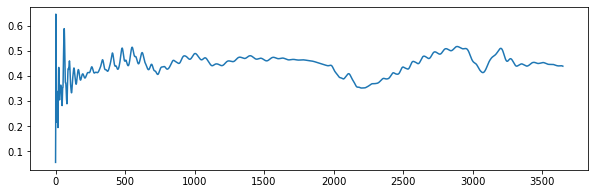

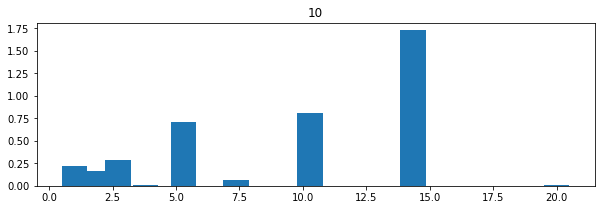

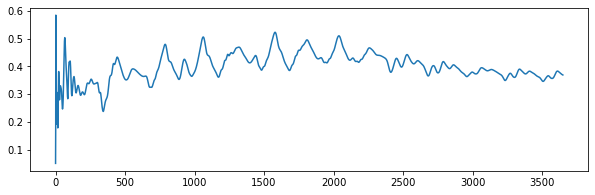

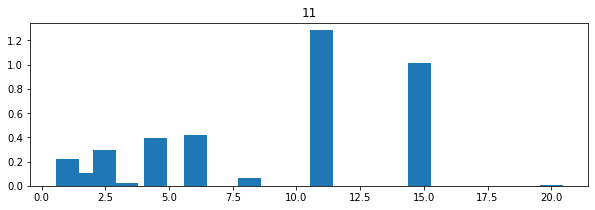

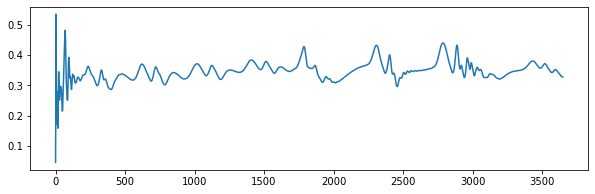

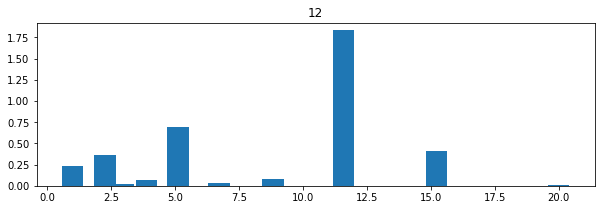

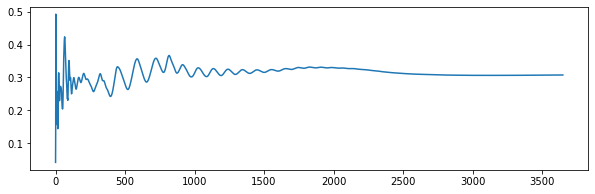

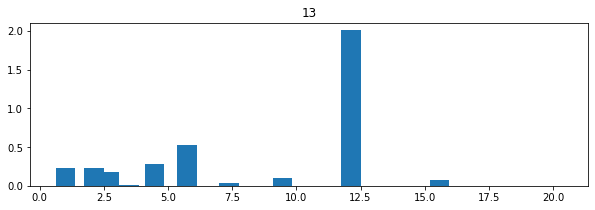

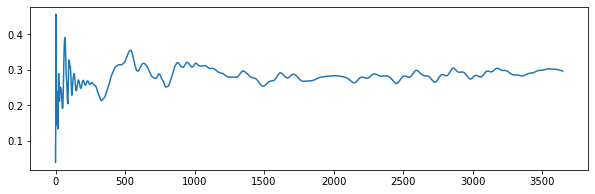

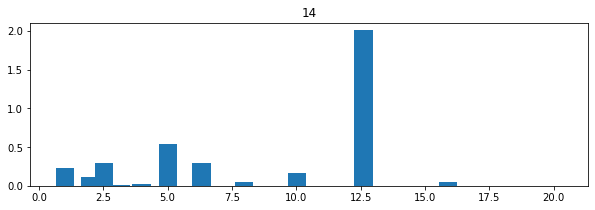

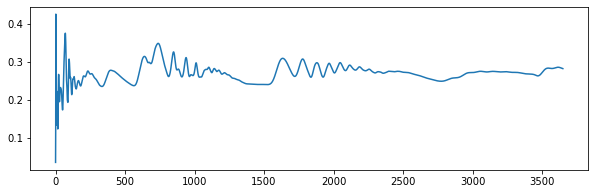

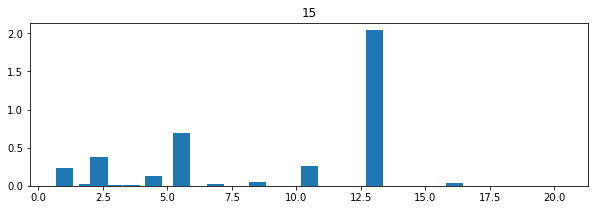

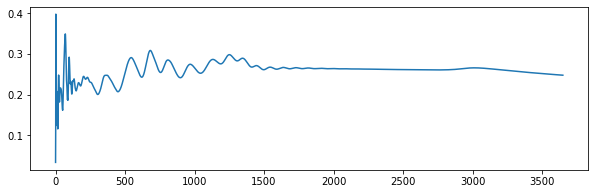

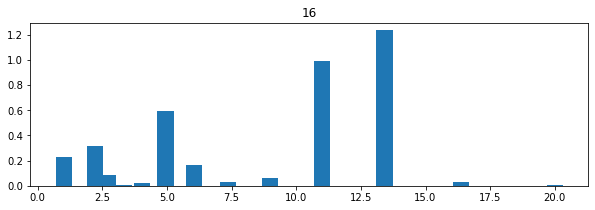

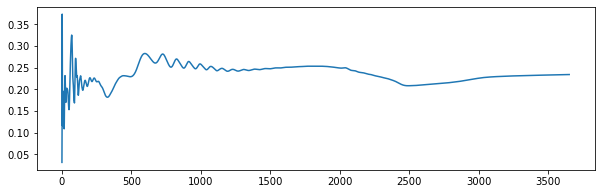

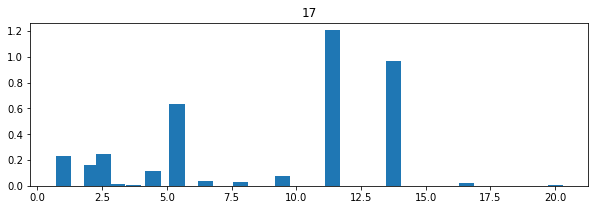

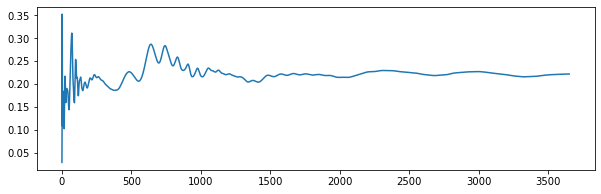

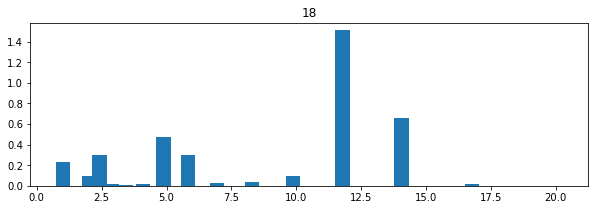

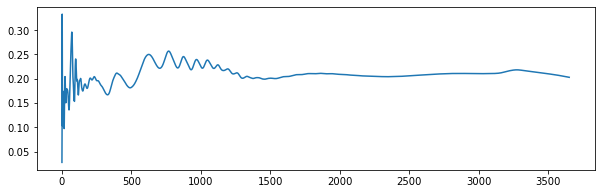

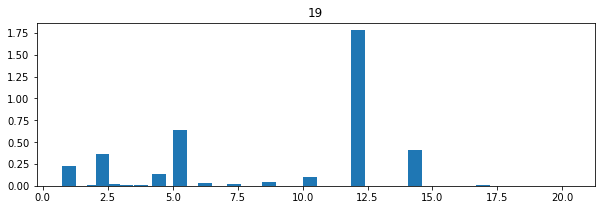

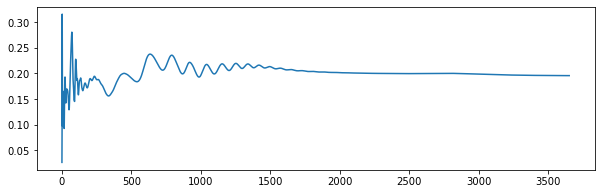

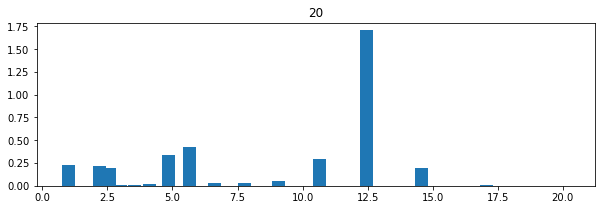

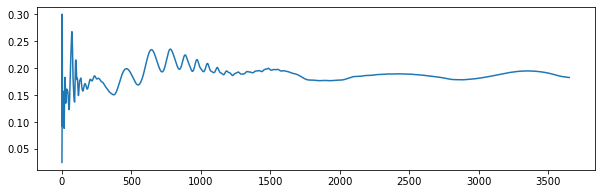

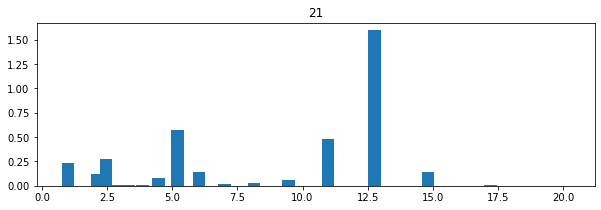

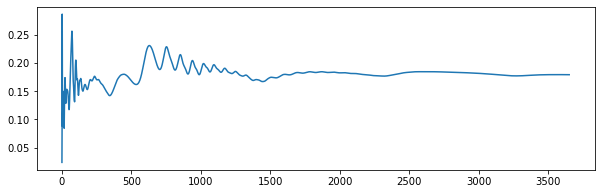

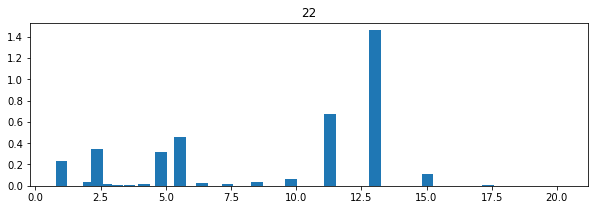

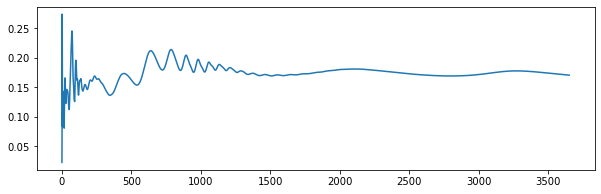

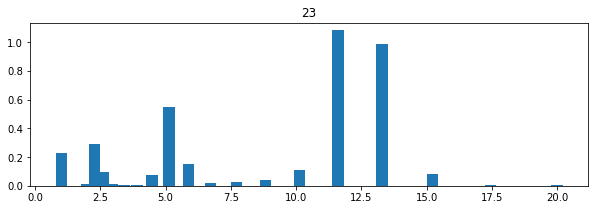

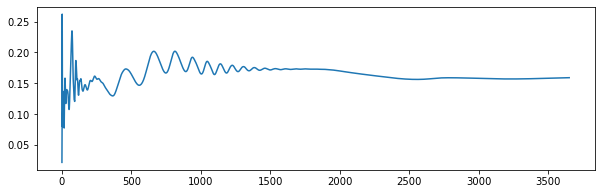

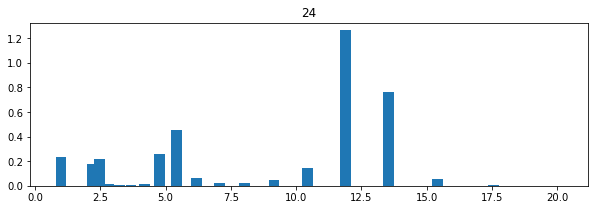

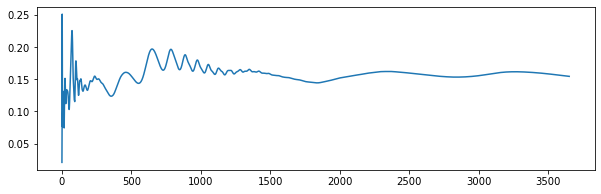

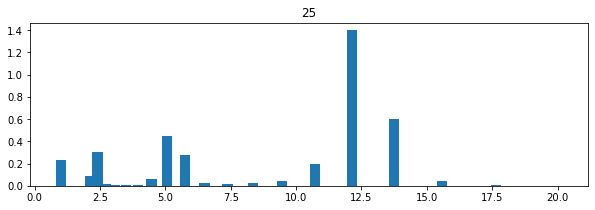

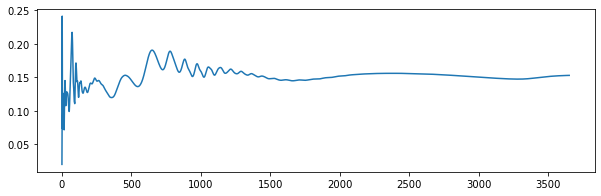

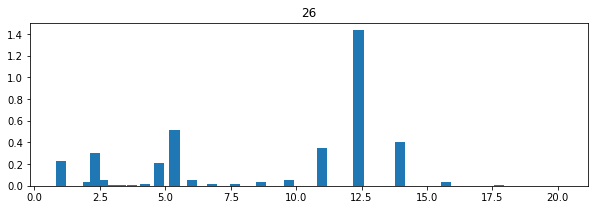

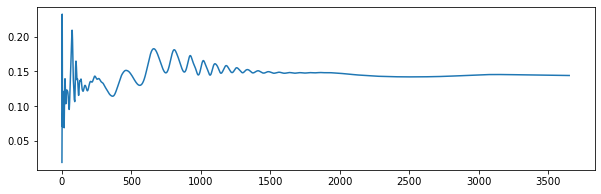

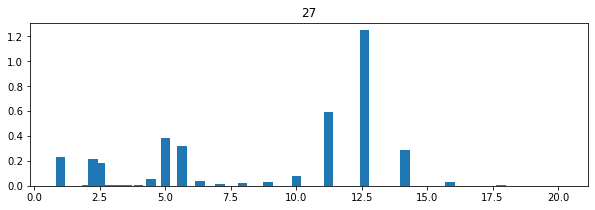

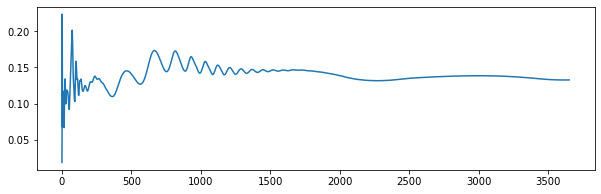

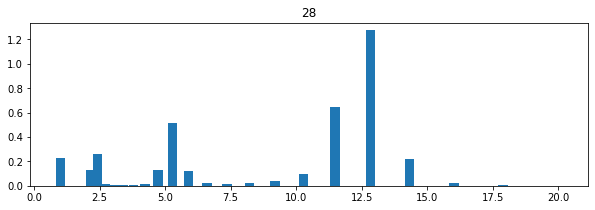

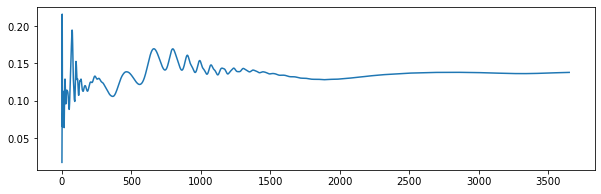

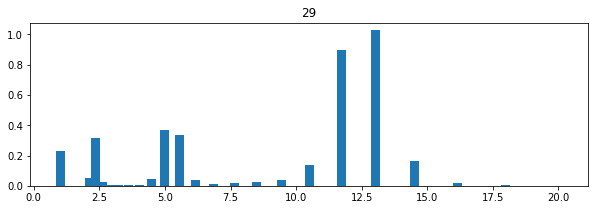

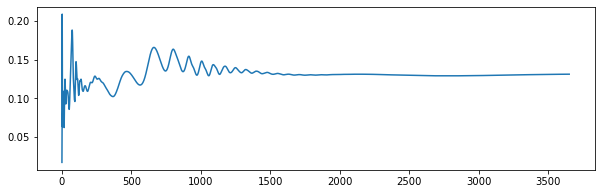

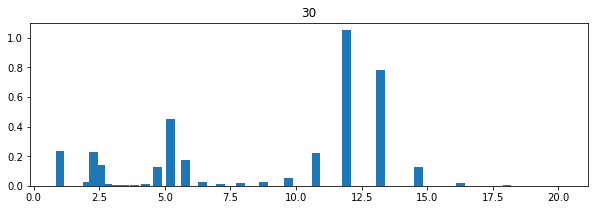

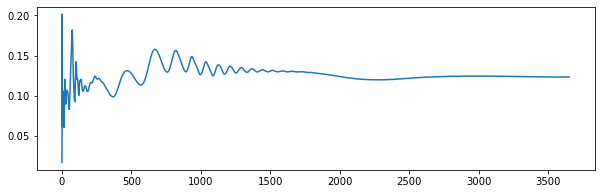

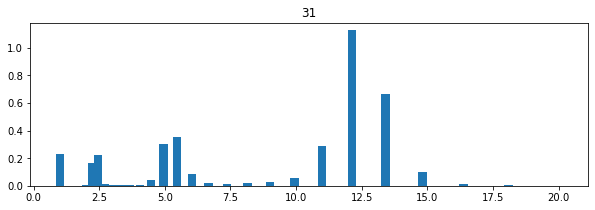

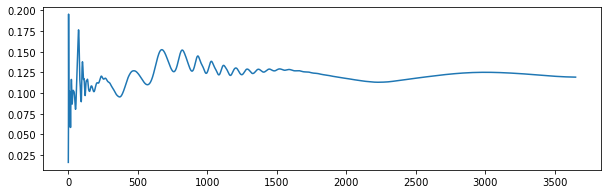

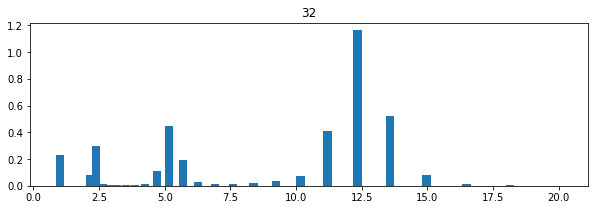

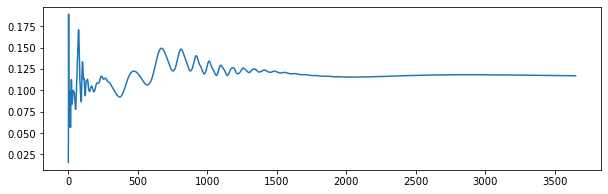

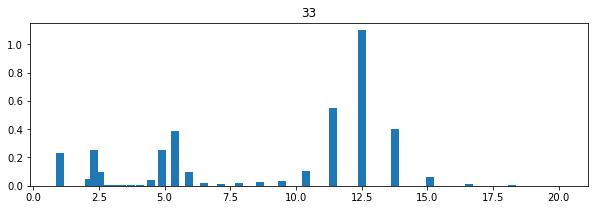

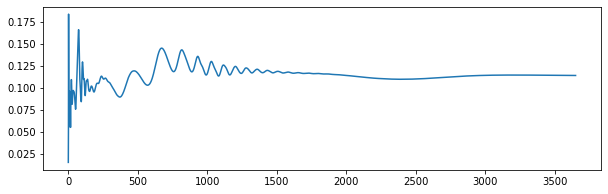

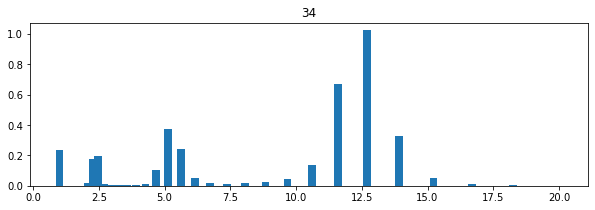

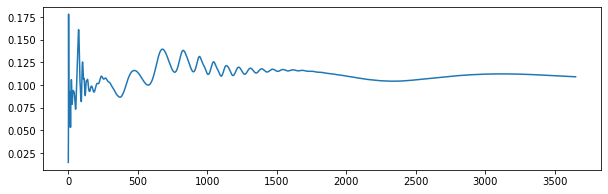

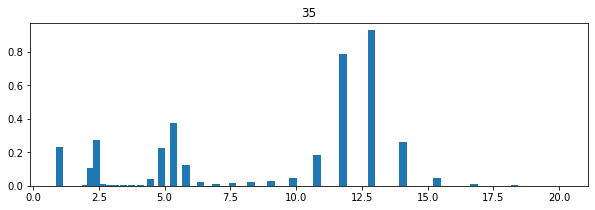

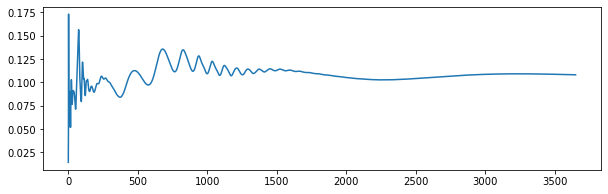

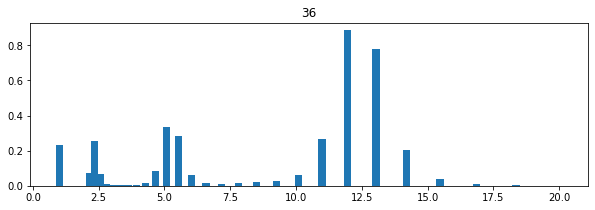

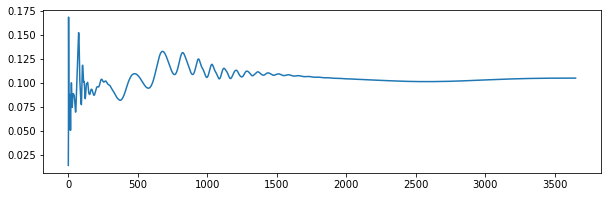

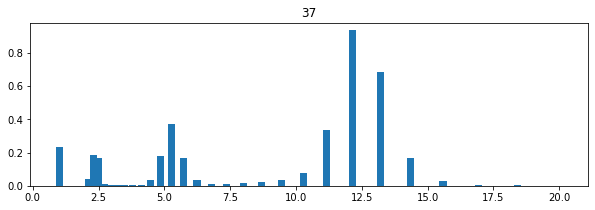

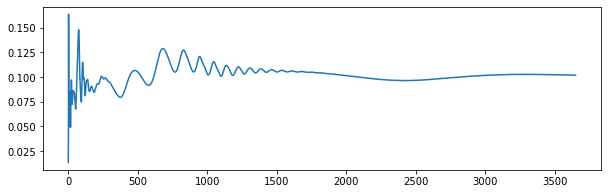

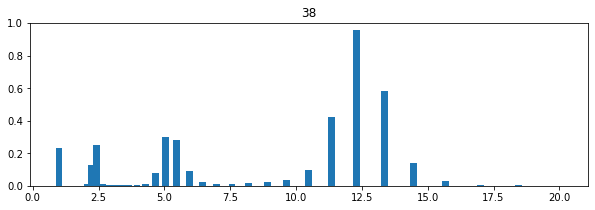

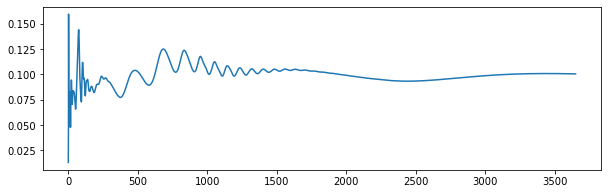

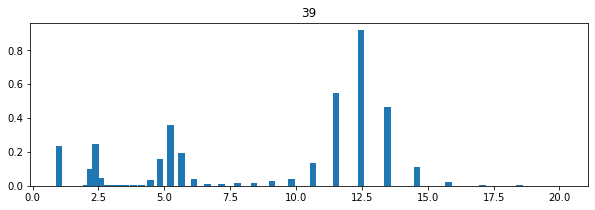

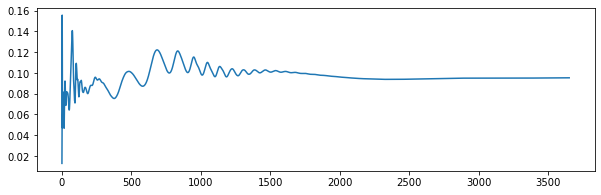

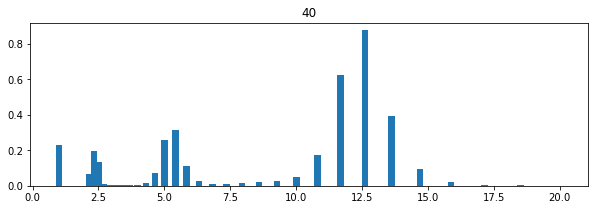

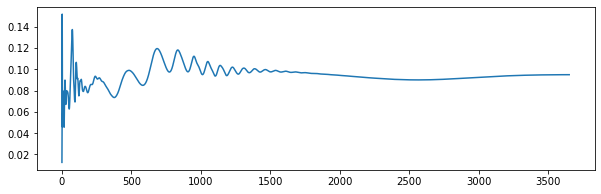

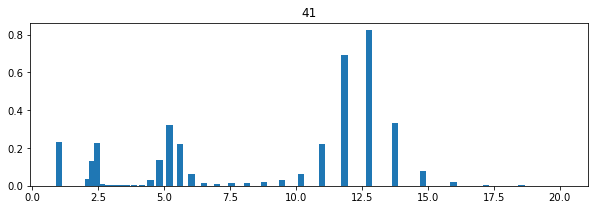

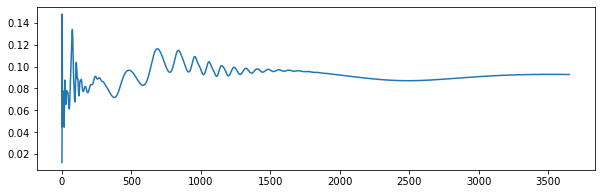

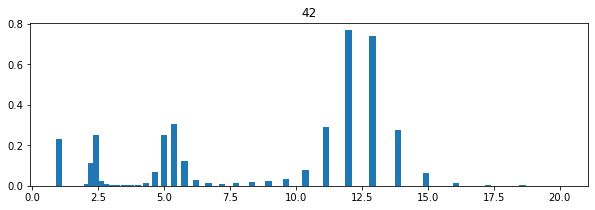

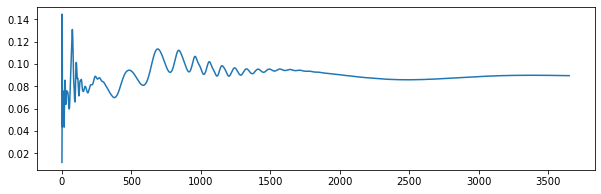

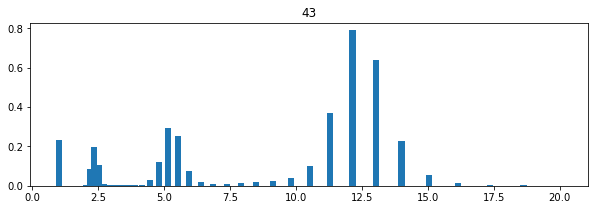

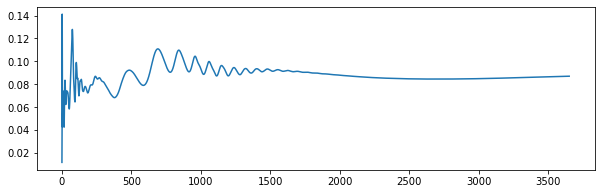

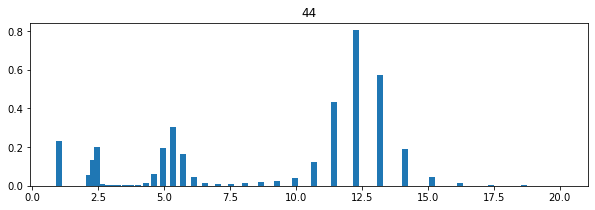

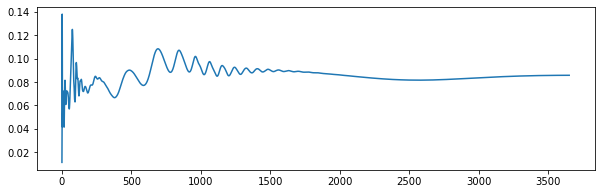

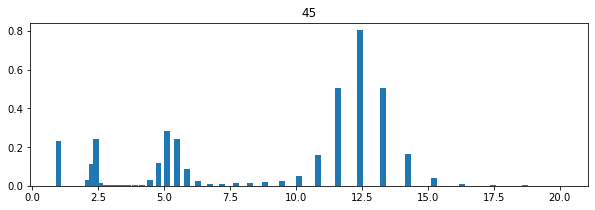

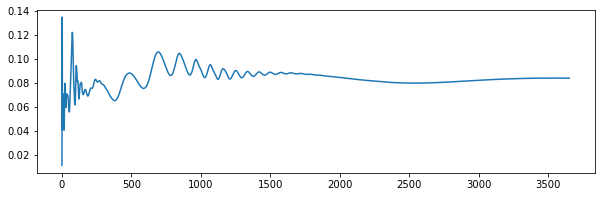

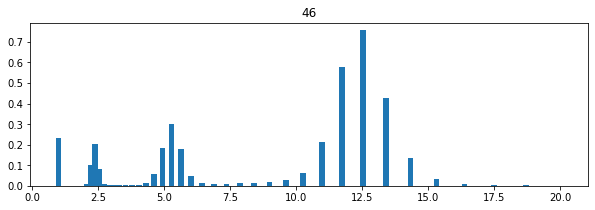

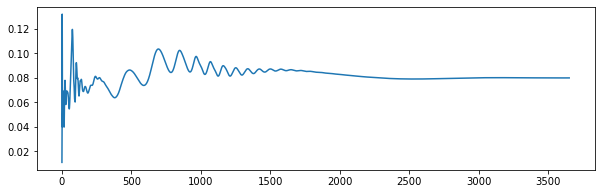

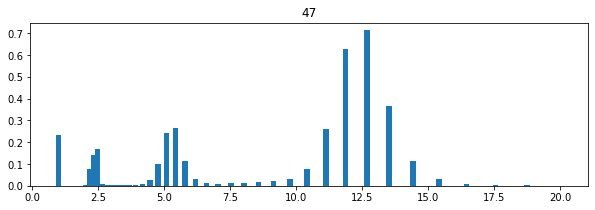

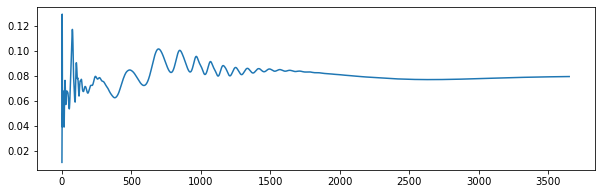

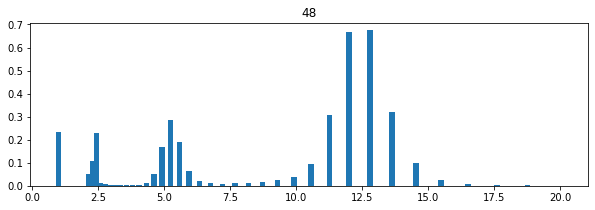

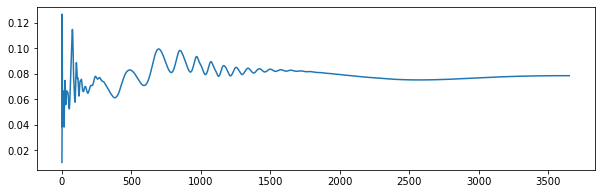

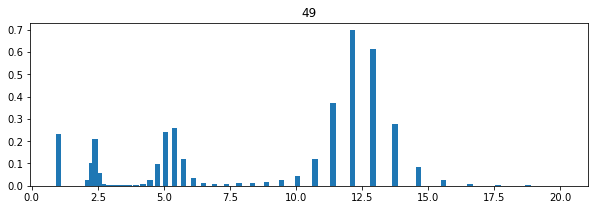

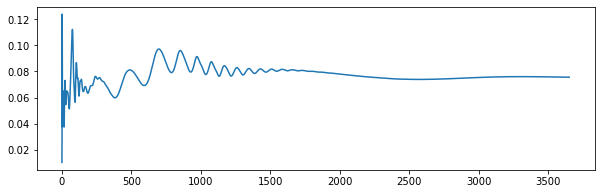

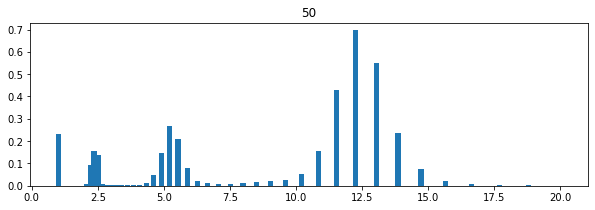

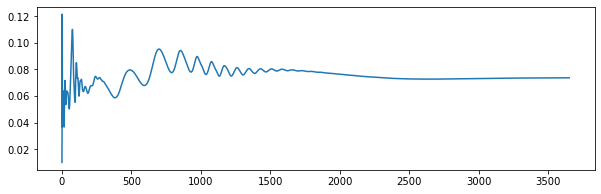

In [156]:
biomass_sum_phyto = []
biomass_sum_zoo = []

for dat in datalist:
    #plt.pcolor(dat.Phytoplankton__var_value)
    #plt.hist(dat.Phytoplankton__var_value[...,-1])
    plt.title(len(dat.Phytoplankton__sizes))
    plt.bar(x=dat.Phytoplankton__sizes, width=10/len(dat.Phytoplankton__sizes),
            height=np.mean(dat.Phytoplankton__var_value, axis=1))
    plt.show()
    plt.plot(np.mean(dat.Phytoplankton__var_value, axis=0).T)
    plt.show()
    
    #biomass_sum_phyto.append(np.sum(dat.Phytoplankton__var_value[...,-365:]))
    #biomass_sum_zoo.append(np.sum(dat.Zooplankton__var_value[...,-365:]))
    """
    plt.hist(np.mean(dat.Phytoplankton__var_value[...,-365:], axis=1))
    plt.title(len(dat.Phytoplankton__sizes))
    plt.show()
    plt.hist(np.mean(dat.Zooplankton__var_value[...,-365:], axis=1))
    plt.show()
    """

In [135]:
import hvplot.xarray
import holoviews as hv

datalist[40].Phytoplankton__var_value.hvplot.image(x='time',y='var', cmap=plt.cm.gray, hover=False)

:Image   [time,var]   (Phytoplankton__var_value)

In [ ]:
ss_ratio_plot = out_ds.marine__ss_ratio_sea.hvplot.image(
    x='x', y='y', clim=(0, 1),
    width=550, height=450,
    cmap=plt.cm.viridis_r, groupby='out'
)

hillshade_plot = hillshade(out_ds, 'out').hvplot.image(
    x='x', y='y', cmap=plt.cm.gray, alpha=0.5,
    colorbar=False, hover=False, groupby='out'
)

yhorizons_plot = out_ds.strati__elevation.sel(y=2e5).hvplot.line(
    by='horizon', groupby='out', ylim=(-1000, 1000),
    width=550, legend='bottom_right',
)

hv.Layout((ss_ratio_plot * hillshade_plot) + yhorizons_plot).cols(1)

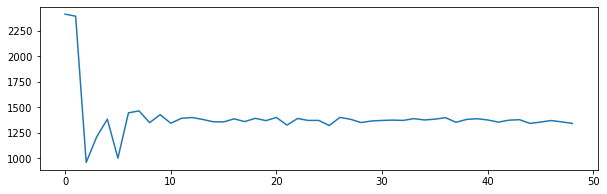

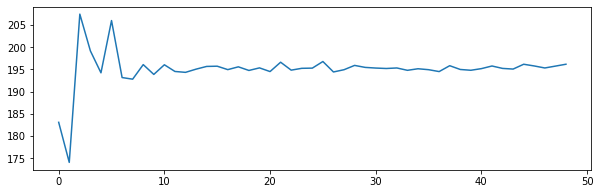

In [126]:
plt.plot(biomass_sum_phyto)
plt.show()
plt.plot(biomass_sum_zoo)

In [81]:
out1 = xr.open_dataset('150PZ_ASTroCAT_odeint_out_10years_1.nc')

In [82]:
out2 = xr.open_dataset('50PZ_ASTroCAT_odeint_out_10years_1.nc')

In [85]:
out3 = xr.open_dataset('5PZ_ASTroCAT_odeint_out_10years_1.nc')

<ipython-input-86-95a5f39e8976>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax1.pcolor(out1.Time__time/365, out1.Phytoplankton__sizes, out1.Phytoplankton__var_value, rasterized=True)


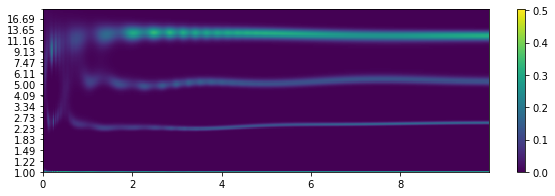

<ipython-input-86-95a5f39e8976>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax1.pcolor(out2.Time__time/365, out2.Phytoplankton__sizes, out2.Phytoplankton__var_value, rasterized=True)


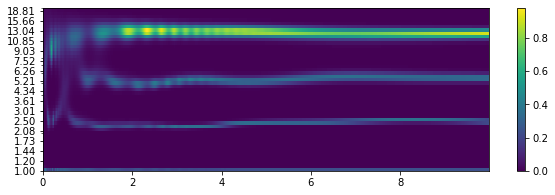

<ipython-input-86-95a5f39e8976>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax1.pcolor(out3.Time__time/365, out3.Phytoplankton__sizes, out3.Phytoplankton__var_value, rasterized=True)


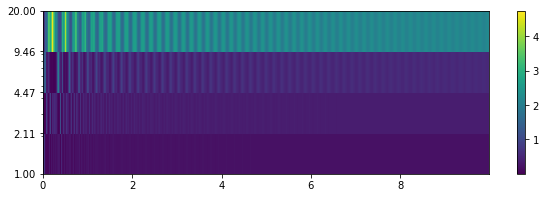

In [86]:
plt.rcParams['figure.figsize'] = [10, 3]
fig1, ax1 = plt.subplots()
pcm = ax1.pcolor(out1.Time__time/365, out1.Phytoplankton__sizes, out1.Phytoplankton__var_value, rasterized=True)
ax1.set_yscale('log')
ax1.set_yticks(out1.Phytoplankton__sizes[::10])
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
fig.colorbar(pcm, ax=ax1)
plt.show()

fig1, ax1 = plt.subplots()
pcm = ax1.pcolor(out2.Time__time/365, out2.Phytoplankton__sizes, out2.Phytoplankton__var_value, rasterized=True)
ax1.set_yscale('log')
ax1.set_yticks(out2.Phytoplankton__sizes[::3])
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
fig.colorbar(pcm, ax=ax1)
plt.show()

fig1, ax1 = plt.subplots()
pcm = ax1.pcolor(out3.Time__time/365, out3.Phytoplankton__sizes, out3.Phytoplankton__var_value, rasterized=True)
ax1.set_yscale('log')
ax1.set_yticks(out3.Phytoplankton__sizes)
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
fig.colorbar(pcm, ax=ax1)
plt.show()

<ipython-input-87-40961f8629b5>:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax1.pcolor(out1.Time__time /365, out1.Zooplankton__sizes, out1.Zooplankton__var_value, rasterized=True)


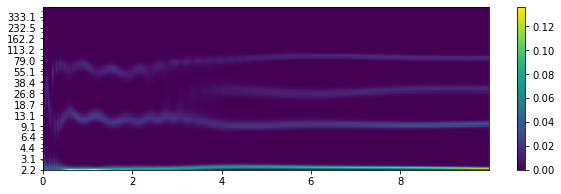

<ipython-input-87-40961f8629b5>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax1.pcolor(out2.Time__time /365, out2.Zooplankton__sizes, out2.Zooplankton__var_value, rasterized=True)


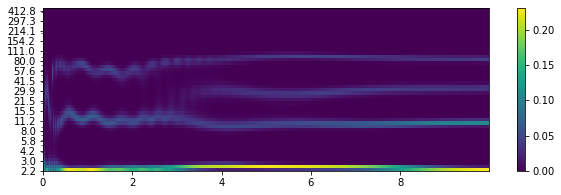

<ipython-input-87-40961f8629b5>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax1.pcolor(out3.Time__time /365, out3.Zooplankton__sizes, out3.Zooplankton__var_value, rasterized=True)


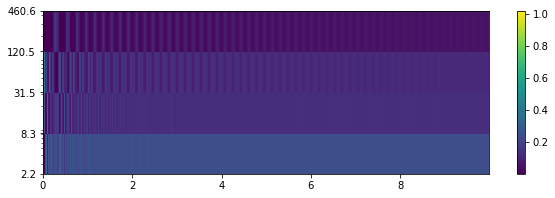

In [87]:
plt.rcParams['figure.figsize'] = [10, 3]
fig1, ax1 = plt.subplots()
pcm = ax1.pcolor(out1.Time__time /365, out1.Zooplankton__sizes, out1.Zooplankton__var_value, rasterized=True)
ax1.set_yscale('log')
ax1.set_yticks(out1.Zooplankton__sizes[::10])
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
fig.colorbar(pcm, ax=ax1)
plt.show()

fig1, ax1 = plt.subplots()
pcm = ax1.pcolor(out2.Time__time /365, out2.Zooplankton__sizes, out2.Zooplankton__var_value, rasterized=True)
ax1.set_yscale('log')
ax1.set_yticks(out2.Zooplankton__sizes[::3])
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
fig.colorbar(pcm, ax=ax1)
plt.show()

fig1, ax1 = plt.subplots()
pcm = ax1.pcolor(out3.Time__time /365, out3.Zooplankton__sizes, out3.Zooplankton__var_value, rasterized=True)
ax1.set_yscale('log')
ax1.set_yticks(out3.Zooplankton__sizes)
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
fig.colorbar(pcm, ax=ax1)
plt.show()

In [9]:
out1.Phytoplankton__sizes

<xarray.DataArray 'Phytoplankton__sizes' (sizes: 50)>
array([ 1.      ,  1.063045,  1.130065,  1.201309,  1.277046,  1.357557,
        1.443144,  1.534127,  1.630846,  1.733663,  1.842962,  1.959151,
        2.082666,  2.213967,  2.353547,  2.501926,  2.65966 ,  2.827338,
        3.005588,  3.195075,  3.396508,  3.610641,  3.838273,  4.080257,
        4.337497,  4.610954,  4.901652,  5.210676,  5.539183,  5.888401,
        6.259635,  6.654273,  7.073791,  7.519758,  7.993841,  8.497812,
        9.033557,  9.603077, 10.208502, 10.852097, 11.536267, 12.263571,
       13.036727, 13.858627, 14.732343, 15.661143, 16.6485  , 17.698103,
       18.81388 , 20.      ])
Dimensions without coordinates: sizes
Attributes:
    description:  store of size array

In [5]:
resolution = 9
resmpl_step = 5

P_out = out1.Phytoplankton__var_value


<ipython-input-36-b3cdd868663b>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(out1.Time__time,out1.Phytoplankton__sizes,out1.Phytoplankton__var_value)


([<matplotlib.axis.YTick at 0x17f5d3670>,
 [Text(0, 1, '1'),
  Text(0, 2, '2'),
  Text(0, 5, '5'),
  Text(0, 10, '10'),
  Text(0, 20, '20')])

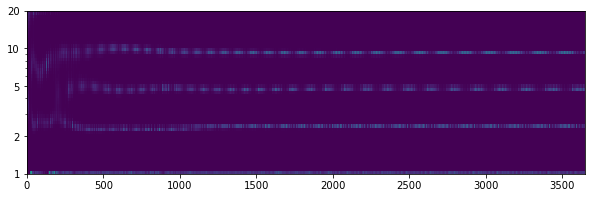

In [36]:
plt.rcParams['figure.figsize'] = [10, 3]
plt.pcolormesh(out1.Time__time,out1.Phytoplankton__sizes,out1.Phytoplankton__var_value)
plt.yscale('log')
plt.yticks([1,2,5,10,20],['1','2','5','10','20'])
#plt.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.set_ylabel('Phytoplankton ESD [µm]')
#plt.set_xlabel('Time [years]')
#plt.xticklabels(labels=[i for i in range(1,11)])

In [39]:
out1.Zooplankton__sizes

<xarray.DataArray 'Zooplankton__sizes' (sizes: 50)>
array([0.65    , 0.672639, 0.696067, 0.720311, 0.745399, 0.771361, 0.798228,
       0.82603 , 0.8548  , 0.884573, 0.915382, 0.947265, 0.980258, 1.0144  ,
       1.049731, 1.086293, 1.124129, 1.163282, 1.203799, 1.245727, 1.289115,
       1.334015, 1.380478, 1.42856 , 1.478316, 1.529805, 1.583088, 1.638227,
       1.695286, 1.754332, 1.815435, 1.878667, 1.9441  , 2.011813, 2.081884,
       2.154395, 2.229432, 2.307083, 2.387438, 2.470592, 2.556642, 2.645689,
       2.737838, 2.833196, 2.931876, 3.033992, 3.139666, 3.24902 , 3.362182,
       3.479286])
Dimensions without coordinates: sizes
Attributes:
    description:  store of size array

<ipython-input-38-6107325c00dc>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(out1.Time__time,out1.Zooplankton__sizes,out1.Zooplankton__var_value)


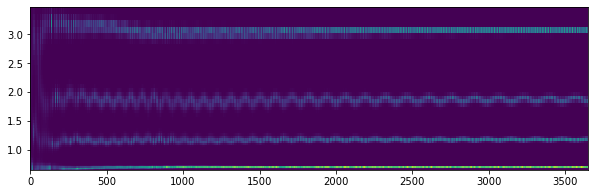

In [38]:
plt.rcParams['figure.figsize'] = [10, 3]
plt.pcolormesh(out1.Time__time,out1.Zooplankton__sizes,out1.Zooplankton__var_value)
#plt.yscale('log')
#plt.yticks([1,2,5,10,20],['1','2','5','10','20'])

In [ ]:
plt.pcolormesh(out1.time[:365*2*resolution:resmpl_step],out1.Phytoplankton__sizes,
               P_out.env__stateout[:365*2*resolution:resmpl_step].T, linewidth=0,rasterized=True)

In [6]:
out1

<xarray.Dataset>
Dimensions:                      (clock: 2, consumer: 50, input_time: 3650, resource: 50, sizes: 50, time: 3650, var: 50)
Coordinates:
  * clock                        (clock) int32 0 1
Dimensions without coordinates: consumer, input_time, resource, sizes, time, var
Data variables:
    GGE__egestion_value          (time) float64 ...
    Inflow__input_value          (time) float64 ...
    N0__forcing_value            (time) float64 ...
    Nutrient__var_value          (time) float64 ...
    Time__time                   (input_time) int32 ...
    GGE__assimilation_value      (consumer, time) float64 ...
    GGE__grazing_value           (resource, time) float64 ...
    Growth__uptake_value         (var, time) float64 ...
    PhytoMortality__decay_value  (var, time) float64 ...
    Phytoplankton__var_value     (var, time) float64 0.01 0.08019 ... 0.464
    ZooMortality__decay_value    (var, time) float64 ...
    Zooplankton__var_value       (var, time) float64 ...
    Grazing__grazing_value       (resource, consumer, time) float64 ...
    Grazing__phiP                (resource, consumer) float64 ...
    Grazing__Imax                (consumer) float64 ...
    Growth__halfsat              (var) float64 ...
    Growth__mu_max               (var) float64 ...
    PhytoMortality__rate         (var) float64 ...
    Phytoplankton__sizes         (sizes) float64 ...
    Phytoplankton__var_init      (var) float64 ...
    Zooplankton__sizes           (sizes) float64 ...
    Zooplankton__var_init        (var) float64 ...
    Core__solver_type            object ...
    Inflow__forcing              object ...
    N0__forcing_label            object ...
    GGE__assimilated_consumer    object ...
    GGE__egested_detritus        object ...
    GGE__grazed_resource         object ...
    Grazing__consumer            object ...
    Grazing__resource            object ...
    Growth__consumer             object ...
    Growth__resource             object ...
    Inflow__var                  object ...
    Nutrient__var_label          object ...
    PhytoMortality__var          object ...
    Phytoplankton__var_label     object ...
    ZooMortality__var            object ...
    Zooplankton__var_label       object ...
    GGE__epsilon                 float64 ...
    GGE__f_eg                    float64 ...
    Grazing__KsZ                 int32 ...
    Inflow__rate                 float64 ...
    N0__value                    float64 ...
    Nutrient__var_init           float64 ...
    ZooMortality__rate           float64 ...

AttributeError: 'DataArray' object has no attribute 'env__stateout'

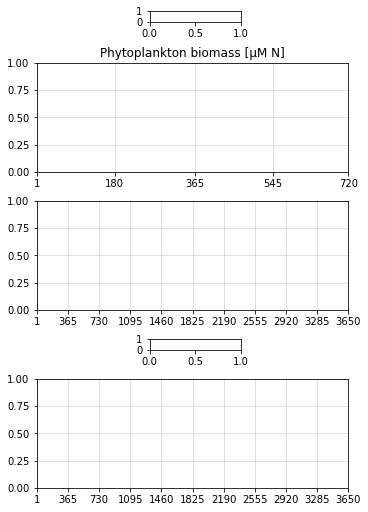

In [8]:
plt.rcParams['figure.figsize'] = [5, 7]

fig = plt.figure(constrained_layout=True)

gs = fig.add_gridspec(nrows=5, ncols=3,
                        hspace=0.1, wspace=0.1, height_ratios=[.1,1,1,.1,1])

ax1col = fig.add_subplot(gs[0, 1])
ax1 = fig.add_subplot(gs[1, 0:3])
ax2 = fig.add_subplot(gs[2, 0:3])
ax3col = fig.add_subplot(gs[3, 1])
ax3 = fig.add_subplot(gs[4, 0:3])


plt.setp(ax1, xticks=[1,180,365,365+180,720])
from matplotlib.ticker import MaxNLocator
for axe in [ax1]:
        axe.grid(True, alpha=0.5)
        axe.get_yaxis().set_major_locator(MaxNLocator(nbins=4))
        #axe.tick_params(top=False, right=True, direction="in")

plt.setp((ax2, ax3), xticks=[1,365,2*365,3*365,4*365,5*365,6*365,7*365,8*365,9*365,10*365])
from matplotlib.ticker import MaxNLocator
for axe in (ax2, ax3):  
        axe.grid(True, alpha=0.5)
        axe.get_yaxis().set_major_locator(MaxNLocator(nbins=4))
        #axe.tick_params(top=False, right=True, direction="in")
        
ax1.set_title('Phytoplankton biomass [µM N]')
ax1plt = ax1.pcolormesh(P_out.time[:365*2*resolution:resmpl_step],out1.Phytoplankton__sizes,
               P_out.env__stateout[:365*2*resolution:resmpl_step].T, linewidth=0,rasterized=True)
ax1plt
ax1.set_yscale('log')
ax1.set_yticks([1,2,5,10,20])
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.colorbar(ax1plt,cax=ax1col, orientation='horizontal')
ax1.set_ylabel('Phytoplankton ESD [µm]')
ax1.set_xlabel('Time [days]')
    
ax2.pcolormesh(P_out.time[::resolution],P_out.P__sizes,P_out.env__stateout[::resolution].T, linewidth=0,rasterized=True)
ax2.set_yscale('log')
ax2.set_yticks([1,2,5,10,20])
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax2.set_ylabel('Phytoplankton ESD [µm]')
ax2.set_xlabel('Time [years]')
ax2.set_xticklabels(labels=[i for i in range(1,11)])

ax3.set_title('Zooplankton biomass [µM N]')
ax3plt = ax3.pcolormesh(Z_out.time[::resolution],Z_out.Z__sizes,Z_out.env__stateout[::resolution].T, linewidth=0,rasterized=True)
ax3plt
ax3.set_yscale('log')
ax3.set_yticks([3,5,10,20,50,100,200,400])
ax3.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.colorbar(ax3plt, cax=ax3col, orientation='horizontal')
ax3.set_ylabel('Zooplankton ESD [µm]')
ax3.set_xlabel('Time [years]')
ax3.set_xticklabels(labels=[i for i in range(1,11)])

# Defining custom 'xlim' and 'ylim' values.
xlim = (0, 365*9+364)

# Setting the values for all axes.
plt.setp((ax2, ax3), xlim=xlim)

#f1.align_ylabels()


#plt.savefig('../03_chemostat.pdf', bbox_inches='tight')
plt.show()

In [40]:
import numpy as np

In [41]:
PZ_num = 50

phyto_init = np.tile(.5/PZ_num, (PZ_num))

zoo_init = np.tile(.1/PZ_num, (PZ_num))


def calculate_sizes(size_min, size_max, num):
    """initializes log spaced array of sizes from ESD size range"""
    numbers = np.array([i for i in range(num)])
    sizes = (np.log(size_max) - np.log(size_min))* numbers / (num-1) + np.log(size_min)
    return np.exp(sizes)


phyto_sizes = calculate_sizes(1,20,PZ_num)

def calculate_zoo_sizes(phytosizes):
    return 0.65 * phytosizes ** 0.56

zoo_sizes = calculate_zoo_sizes(phyto_sizes)

In [42]:
phyto_sizes

array([ 1.        ,  1.06304496,  1.13006459,  1.20130946,  1.27704597,
        1.35755728,  1.44314442,  1.5341274 ,  1.6308464 ,  1.73366305,
        1.84296177,  1.95915122,  2.08266583,  2.21396741,  2.35354689,
        2.50192616,  2.65966   ,  2.82733815,  3.00558757,  3.19507472,
        3.39650807,  3.61064079,  3.83827349,  4.08025729,  4.33749694,
        4.61095426,  4.90165168,  5.21067612,  5.53918298,  5.88840055,
        6.25963452,  6.65427293,  7.07379129,  7.51975818,  7.99384103,
        8.49781241,  9.03355665,  9.60307686, 10.20850245, 10.85209708,
       11.5362671 , 12.26357059, 13.0367269 , 13.85862682, 14.73234338,
       15.66114337, 16.64849952, 17.6981035 , 18.81387972, 20.        ])

In [43]:
zoo_sizes

array([0.65      , 0.67263935, 0.69606723, 0.72031109, 0.74539936,
       0.77136145, 0.79822779, 0.82602988, 0.85480031, 0.88457281,
       0.91538228, 0.94726483, 0.98025785, 1.0144    , 1.04973132,
       1.08629322, 1.12412857, 1.16328171, 1.20379854, 1.24572657,
       1.28911494, 1.33401452, 1.38047794, 1.42855967, 1.47831607,
       1.52980548, 1.58308825, 1.63822686, 1.69528592, 1.75433234,
       1.81543533, 1.87866653, 1.94410005, 2.01181261, 2.08188358,
       2.15439511, 2.2294322 , 2.30708281, 2.38743798, 2.47059189,
       2.55664204, 2.6456893 , 2.73783805, 2.83319632, 2.9318759 ,
       3.03399246, 3.13966572, 3.24901956, 3.36218216, 3.4792862 ])